## AutoEncode 노이즈 제거
---
- 데이터에 노이즈 제거 활용
- 데이터에서 주요 특징만 추출 압축하기 때문에 노이즈는 주요 특징에서 제거
- 압축된 주요 특징으로 데이터 복원 => 노이즈 제거

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [2]:
(x_train, y_train), (x_test, y_test)=load_data()
print(f'x_train.shape : {x_train.shape}, x_test.shape: {x_test.shape}')
print(f'y_train.shape : {y_test.shape}, y_test.shape: {x_test.shape}')

x_train.shape : (60000, 28, 28), x_test.shape: (10000, 28, 28)
y_train.shape : (10000,), y_test.shape: (10000, 28, 28)


In [3]:
x_train=x_train.reshape(-1, 28*28)/255.0
x_test=x_test.reshape(-1, 28*28)/255.0

In [4]:
# 데이터셋에 노이즈 추가
# np.random.normal(평균loc=0.0, 표준편차scale=1.0, 출력size=None)
x_train_noised = x_train + np.random.normal(0, 0.5, size=x_train.shape)
x_test_noised = x_test + np.random.normal(0, 0.5, size=x_test.shape)

# 픽셀범위 0.0~1.0 벗어나는 픽셀값 조정 np.clip(array, min, max)
x_train_noised = np.clip(x_train_noised, a_min=0, a_max=1)
x_test_noised = np.clip(x_test_noised, a_min=0, a_max=1)

## 모델 생성 및 학습

In [5]:
# W,b 초기값 고정
set_random_seed(11)

In [6]:
def createAEModel (n_node):
    model=Sequential()
    # 입력
    model.add(Dense(units=n_node, activation='relu', input_shape=(784,)))
    # 출력
    model.add(Dense(784, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [7]:
twentyModel=createAEModel(20)
oneHundredModel=createAEModel(100)
fiveHundredModel=createAEModel(500)

In [8]:
twentyModel.fit(x_train_noised, x_train, epochs=10)
oneHundredModel.fit(x_train_noised, x_train, epochs=10)
fiveHundredModel.fit(x_train_noised, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0447
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0275
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0263
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0261
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0259
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0258
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0257
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0256
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0255
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0254
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0306
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0181
Epo

In [9]:
pre_out=fiveHundredModel.predict(x_train_noised[0].reshape(-1, 784))

1/1 [==============================] - 0s 82ms/step


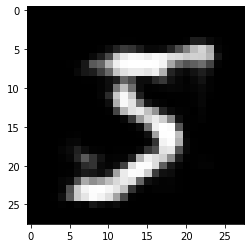

In [10]:
plt.imshow(pre_out.reshape(28,28), cmap='gray')
plt.show()

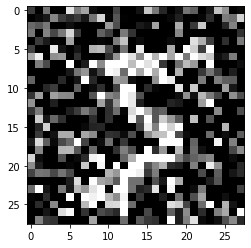

In [11]:
plt.imshow(x_train_noised[0].reshape(28,28), cmap='gray')
plt.show()

## CNN

In [64]:
def createCNNModel (layer):
    model1=Sequential()
    # 입력
    model1.add(Conv2D(layer,
                      kernel_size=3,
                      padding='same', 
                      input_shape=(28, 28, 1),
                      activation='relu'))
#     model1.add(MaxPool2D())
#     model1.add(Flatten())
    # 출력
    model1.add(Conv2D(1,
                      padding='same',
                      kernel_size=3,
                      activation='sigmoid'))
    model1.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')
    return model1

In [65]:
twentyModel=createCNNModel(20)
x_train_noised=x_train_noised.reshape(-1,28,28,1)
x_train=x_train.reshape(-1,28,28,1)

In [66]:
twentyModel.fit(x_train_noised, x_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1511 - accuracy: 0.8099
Epoch 2/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1141 - accuracy: 0.8118
Epoch 3/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1123 - accuracy: 0.8119
Epoch 4/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1106 - accuracy: 0.8120
Epoch 5/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1099 - accuracy: 0.8121
Epoch 6/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1095 - accuracy: 0.8121
Epoch 7/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1093 - accuracy: 0.8121
Epoch 8/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1092 - accuracy: 0.8121
Epoch 9/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1091 - accuracy: 0.8122
Epoch 10/30
1875/1875 [==============================] - 30s 16m

In [81]:
pre_out=twentyModel.predict(x_train_noised[0].reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s 47ms/step


In [82]:
pre_out.round(2), pre_out.shape

(array([[[[0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ]],
 
         [[0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.  ],
          [0.01],
          [0.  ],
       

In [83]:
def compareimage(nldx, pre_out):
    plt.subplot(1, 2, 1)
    plt.imshow(x_train_noised[nldx].reshape(28,28), cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(pre_out.reshape(28,28), cmap='gray')
    plt.tight_layout()
    plt.show()

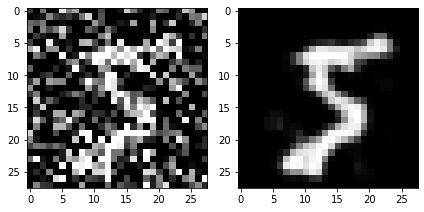

In [84]:
compareimage(0, pre_out)